<a href="https://colab.research.google.com/github/jgesc-05/clase-inteligencia-artificial/blob/main/Ejercicio_SVC_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mathchi/diabetes-data-set")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


In [26]:
import pandas as pd
df = pd.read_csv(path + "/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
df.shape

(768, 9)

In [28]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
#Vamos a graficar la caja de bigotes de cada variable
import seaborn as sns
import matplotlib.pyplot as plt
#graficar cada variable

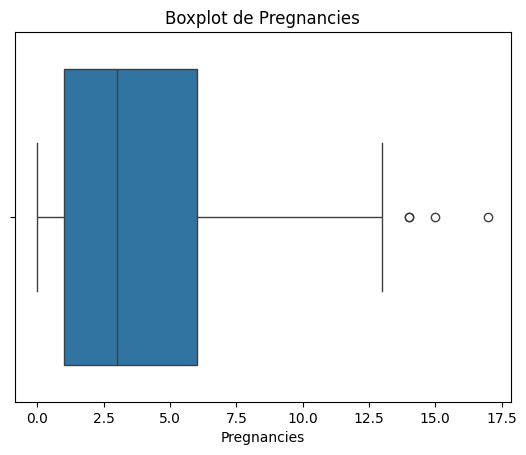

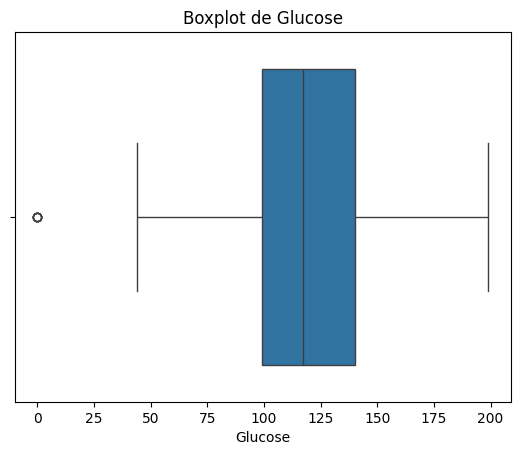

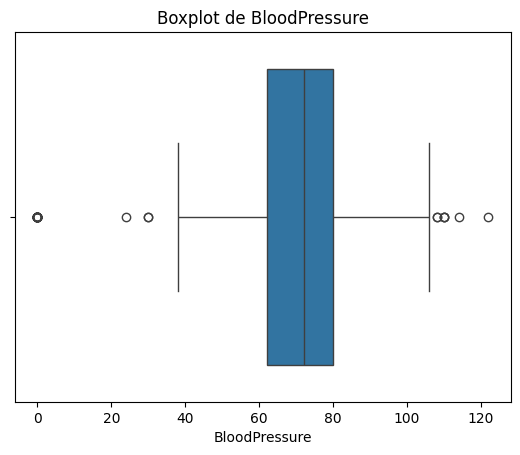

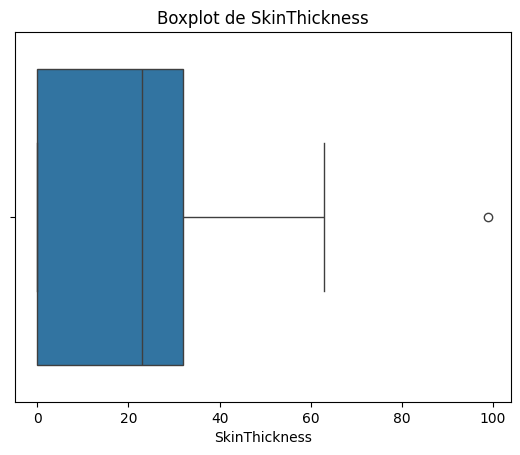

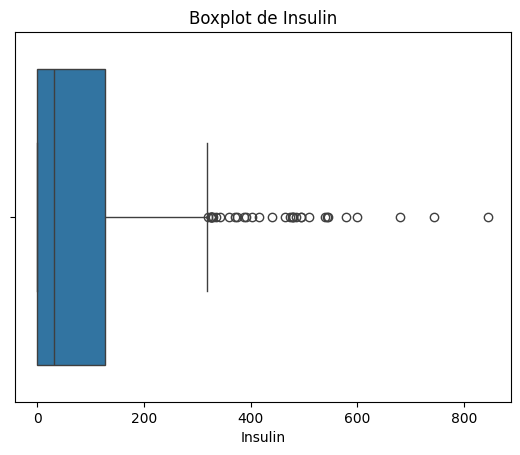

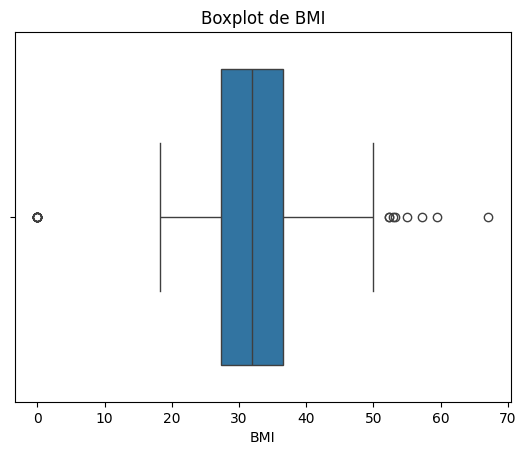

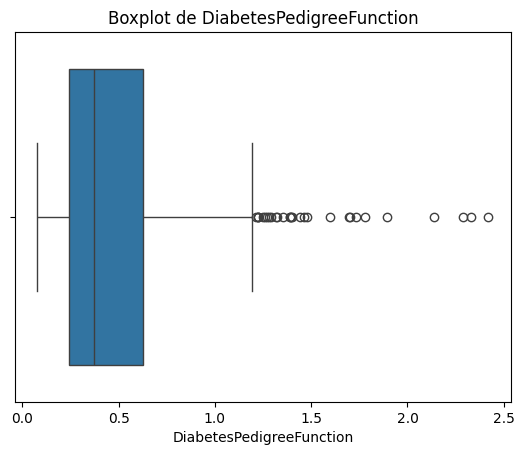

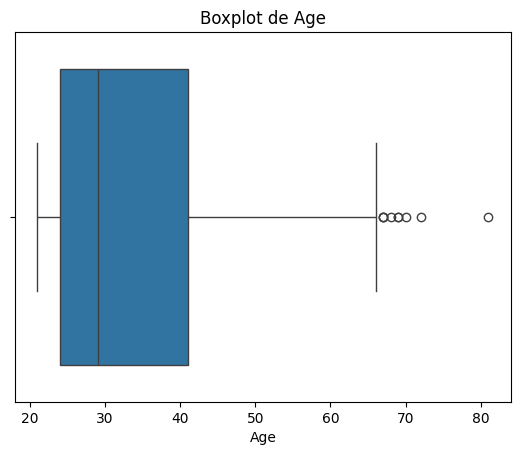

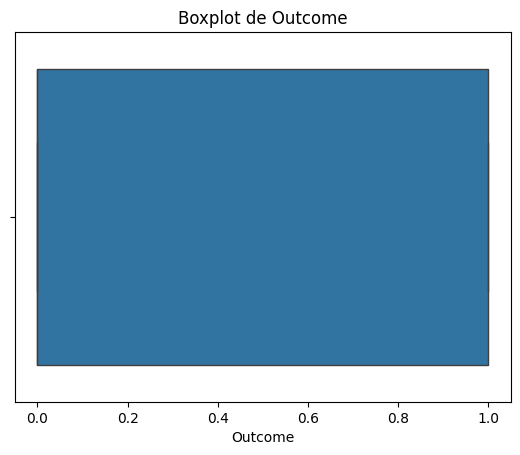

In [30]:
# prompt: Graficar las variables con boxplot

import matplotlib.pyplot as plt
# Vamos a graficar la caja de bigotes de cada variable
for column in df.columns:
  plt.figure()  # Crea una nueva figura para cada variable
  sns.boxplot(x=df[column])
  plt.title(f"Boxplot de {column}")
  plt.show()


In [31]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [32]:
# prompt: Normalizamos solo los features de entrenamiento y de prueba usando minmax

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Separar características (X) y etiqueta (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


# Normalizar las características usando MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
X_train

array([[0.05882353, 0.6080402 , 0.63934426, ..., 0.58122206, 0.07884187,
        0.11666667],
       [0.70588235, 0.44221106, 0.60655738, ..., 0.52608048, 0.13095768,
        0.45      ],
       [0.05882353, 0.54271357, 0.49180328, ..., 0.5290611 , 0.14743875,
        0.05      ],
       ...,
       [0.05882353, 0.48743719, 0.57377049, ..., 0.56780924, 0.0596882 ,
        0.15      ],
       [0.52941176, 0.7839196 , 0.70491803, ..., 0.51117735, 0.4922049 ,
        0.35      ],
       [0.23529412, 0.72361809, 0.47540984, ..., 0.43964232, 0.09042316,
        0.26666667]])

In [44]:


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Crear un modelo SVM
model = SVC(kernel = 'poly', C = .5)  # Puedes probar diferentes kernels (linear, rbf, poly, sigmoid)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy}")

print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))


Exactitud del modelo: 0.75

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       125
           1       0.69      0.51      0.59        67

    accuracy                           0.75       192
   macro avg       0.73      0.69      0.70       192
weighted avg       0.74      0.75      0.74       192



In [45]:
# prompt: Realizar inferencias del modelo svc utlizando gridsearch usando c desde 0.5 a 5 con pasos de 0.1, y kernel ‘linear’, ‘poly’, ‘rbf’

from sklearn.model_selection import GridSearchCV

# Definir los parámetros para GridSearchCV
param_grid = {
    'C': [i/10 for i in range(5, 51)],  # Valores de C de 0.5 a 5 con pasos de 0.1
    'kernel': ['linear', 'poly', 'rbf']  # Kernels a probar
}

# Crear un modelo SVM
svc_model = SVC()

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Imprimir la mejor puntuación de exactitud
print("Mejor puntuación de exactitud:", grid_search.best_score_)

# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar el mejor modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del mejor modelo: {accuracy}")

print("\nInforme de clasificación del mejor modelo:")
print(classification_report(y_test, y_pred))


Mejores parámetros: {'C': 2.0, 'kernel': 'linear'}
Mejor puntuación de exactitud: 0.7899400299850076
Exactitud del mejor modelo: 0.7291666666666666

Informe de clasificación del mejor modelo:
              precision    recall  f1-score   support

           0       0.76      0.86      0.80       125
           1       0.65      0.49      0.56        67

    accuracy                           0.73       192
   macro avg       0.70      0.67      0.68       192
weighted avg       0.72      0.73      0.72       192

